In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Read in data and basic EDA

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
raw_interactions = pd.read_csv("../../data/recommendation/RAW_interactions.csv")
raw_recipes = pd.read_csv("../../data/recommendation/RAW_recipes.csv")
interaction_train = pd.read_csv("../../data/recommendation/interactions_train.csv")
interaction_validation = pd.read_csv("../../data/recommendation/interactions_validation.csv")

In [10]:
raw_interactions.columns

Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')

In [12]:
raw_recipes.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [15]:
raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [23]:
raw_recipes.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

In [134]:
raw_recipes.shape

(231636, 12)

#### The data present us with 231636 recipes, each with 12 features.

In [109]:
raw_recipes.isna().any()

name               True
id                False
minutes           False
contributor_id    False
submitted         False
tags              False
nutrition         False
n_steps           False
steps             False
description        True
ingredients       False
n_ingredients     False
dtype: bool

In [114]:
raw_recipes[raw_recipes['name'].isna()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
721,NaN,368257,10,779451,2009-04-27,"['15-minutes-or-less', 'time-to-make', 'course...","[1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]",6,"['in a bowl , combine ingredients except for o...",-------------,"['lemon', 'honey', 'horseradish mustard', 'gar...",10


In [123]:
raw_recipes.dropna(subset=['name'], inplace = True)

In [124]:
raw_recipes.shape

(231636, 12)

In [135]:
raw_recipes['name'].nunique

<bound method IndexOpsMixin.nunique of 0           arriba   baked winter squash mexican style
1                     a bit different  breakfast pizza
2                            all in the kitchen  chili
3                                   alouette  potatoes
4                   amish  tomato ketchup  for canning
                              ...                     
231632                                     zydeco soup
231633                                zydeco spice mix
231634                       zydeco ya ya deviled eggs
231635          cookies by design   cookies on a stick
231636    cookies by design   sugar shortbread cookies
Name: name, Length: 231636, dtype: object>

#### There is only one data point that is a missing value. The data point doesn't have attribute name. Therefore, we delete this datapoint.

In [143]:
raw_recipes[['minutes','n_steps','n_ingredients']].describe()

,minutes,n_steps,n_ingredients
count,2.316360e+05,231636.000000,231636.000000
mean,9.398587e+03,9.765516,9.051149
std,4.461973e+06,5.995136,3.734803
min,0.000000e+00,0.000000,1.000000
25%,2.000000e+01,6.000000,6.000000
50%,4.000000e+01,9.000000,9.000000
75%,6.500000e+01,12.000000,11.000000
max,2.147484e+09,145.000000,43.000000


In [139]:
raw_recipes[['minutes','n_steps','n_ingredients']].corr()

,minutes,n_steps,n_ingredients
minutes,1.000000,-0.000257,-0.000592
n_steps,-0.000257,1.000000,0.427706
n_ingredients,-0.000592,0.427706,1.000000


#### After analyzing the quantitative data, we found that the mean steps of cooking is around 9.5 steps; mean cooking time is about 9 mins, and mean number of ingredient is around 9. Also, there is positive relations between steps and ingredients.

array([[<AxesSubplot: title={'center': 'n_ingredients'}>]], dtype=object)

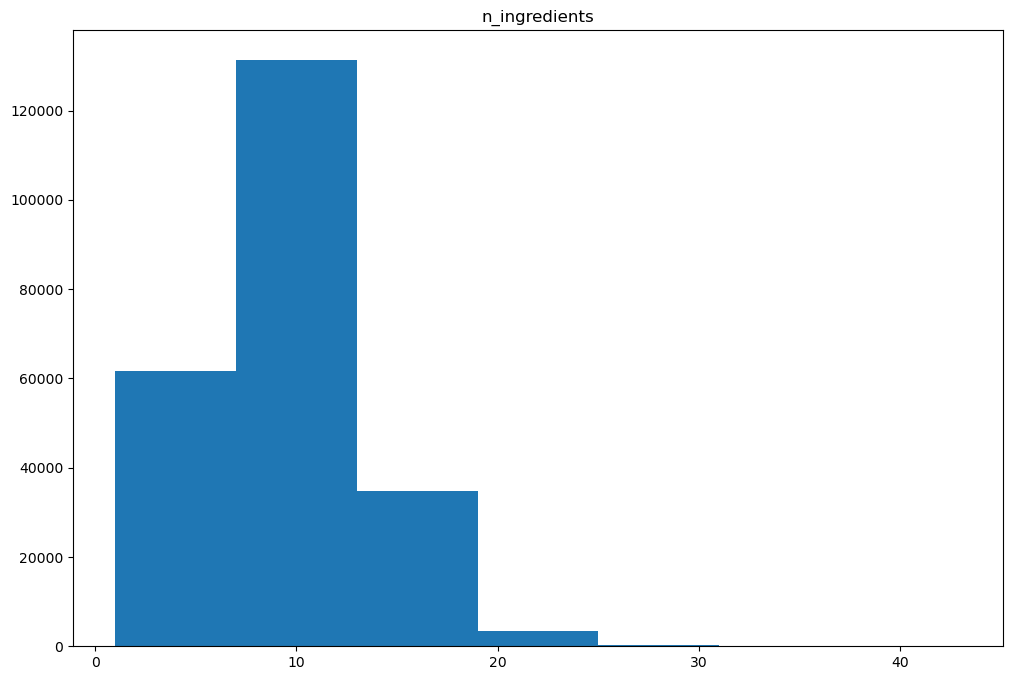

In [130]:
raw_recipes.hist(column='n_ingredients', bins=7, grid=False, figsize=(12,8))

## 2. Data cleaning

In [54]:
recipes = raw_recipes[['name','id','ingredients']]

In [83]:
def _my_list(x):
    exec("a =" + x)
    return a

import ast
recipes["ingredients_list"] = recipes["ingredients"].apply(lambda x: ast.literal_eval(x))

/var/folders/mt/bm2h50kj2872xhymzl24djch0000gn/T/ipykernel_72494/564077404.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes["ingredients_list"] = recipes["ingredients"].apply(lambda x: ast.literal_eval(x))


In [85]:
recipes['ingredients_list'][0]

['winter squash',
 'mexican seasoning',
 'mixed spice',
 'honey',
 'butter',
 'olive oil',
 'salt']

In [86]:
recipes.drop(["ingredients",'ingredient_list'], axis=1)

,name,id,ingredients_list
0,arriba baked winter squash mexican style,137739,"[winter squash, mexican seasoning, mixed spice..."
1,a bit different breakfast pizza,31490,"[prepared pizza crust, sausage patty, eggs, mi..."
2,all in the kitchen chili,112140,"[ground beef, yellow onions, diced tomatoes, t..."
3,alouette potatoes,59389,"[spreadable cheese with garlic and herbs, new ..."
4,amish tomato ketchup for canning,44061,"[tomato juice, apple cider vinegar, sugar, sal..."
...,...,...,...
231632,zydeco soup,486161,"[celery, onion, green sweet pepper, garlic clo..."
231633,zydeco spice mix,493372,"[paprika, salt, garlic powder, onion powder, d..."
231634,zydeco ya ya deviled eggs,308080,"[hard-cooked eggs, mayonnaise, dijon mustard, ..."
231635,cookies by design cookies on a stick,298512,"[butter, eagle brand condensed milk, light bro..."


In [97]:
recipes = pd.concat([recipes,raw_recipes['n_ingredients']], axis =1)

In [99]:
recipes.head()

,name,id,ingredients_list,n_ingredients
0,arriba baked winter squash mexican style,137739,"[winter squash, mexican seasoning, mixed spice...",7
1,a bit different breakfast pizza,31490,"[prepared pizza crust, sausage patty, eggs, mi...",6
2,all in the kitchen chili,112140,"[ground beef, yellow onions, diced tomatoes, t...",13
3,alouette potatoes,59389,"[spreadable cheese with garlic and herbs, new ...",11
4,amish tomato ketchup for canning,44061,"[tomato juice, apple cider vinegar, sugar, sal...",8
